In [1]:
import os
from os import listdir
from os.path import isfile, join
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from torchvision.io import read_image
import torchvision.models as models
import torch.fft as fft
import torch.nn as nn
import torch.nn.functional as F
#from skimage import io, transform
import datetime
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torchvision.transforms as T
from PIL import Image

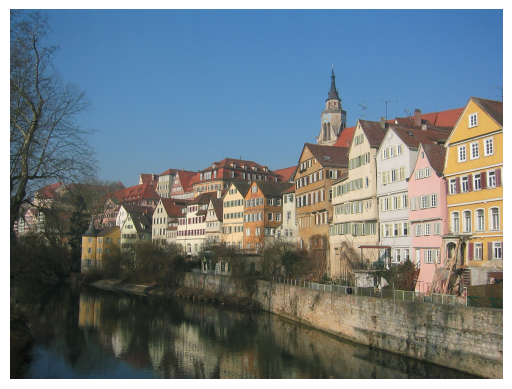

In [2]:
plt.figure()
img = mpimg.imread('./tubingen.jpg')
imgplot = plt.imshow(img)
plt.axis("off")
plt.show()

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
])
image_tensor = transform(img)
print(image_tensor.shape)

transformGray = transforms.Grayscale()
gray_tensor = transformGray(image_tensor)

fft_result = fft.fft2(gray_tensor)
fft_PSD = torch.square( abs(fft_result) )
hybrid_tensor = torch.cat((image_tensor, fft_PSD), dim=0)
hybrid_tensor_list = hybrid_tensor.unsqueeze(0)

print(hybrid_tensor_list.shape)



torch.Size([3, 768, 1024])
torch.Size([1, 4, 768, 1024])


c:\Users\Weiyu Cao\.conda\envs\cs7643-a3\Lib\site-packages\torchvision\transforms\functional.py:152: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_numpy.cpp:212.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


In [4]:
input_channels = 4
model_4C = models.swin_t(num_classes=2, progress=True)
first_conv_layer = model_4C.get_submodule('features')[0][0]
new_first_conv_layer = nn.Conv2d(input_channels, first_conv_layer.out_channels, kernel_size=first_conv_layer.kernel_size, stride=first_conv_layer.stride)
model_4C.get_submodule('features')[0][0] = new_first_conv_layer
print(model_4C(hybrid_tensor_list))

tensor([[ 0.0813, -0.9725]], grad_fn=<AddmmBackward0>)


In [5]:
first_conv_layer = model_4C.get_submodule('features')[0][0]
print(first_conv_layer.in_channels)

4
